### Importing basic libraries

In [134]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the Training dataset

In [135]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\bigdatamart_Train.csv')
df.head() ### Checking the dataset 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [136]:
### Checking the shape of the dataset
df.shape

(8523, 12)

In [137]:
###Checking the null values 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [138]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Droping some feature which dose not has any relation with target like  - Item_Identifier,Item_Type and Outlet_Identifier 

In [139]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True, axis =0)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [140]:
### Filling the missing data with SimpleImputer 
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Outlet_Size']=si.fit_transform( df[['Outlet_Size']])

### Now changing the categorical feature into the integer value.

In [141]:
#### Changing the Categorical valuse with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
col=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type', 'Item_Type']
df[col]= df[col].apply(le.fit_transform)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [142]:
#We have some doubt like Item_Type is has any relation with target or not. So, I will drop scatter plot and Heatmap and then drop.
df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [143]:
df.isnull().sum() ### Again Checking the missing value.

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### The Item_Weight still has missing value and will deal with SimpleImputer

In [144]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy='mean')
df['Item_Weight']=si.fit_transform( df[['Item_Weight']])

In [145]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### There is no missing value now. Moving toward EDA. 

In [146]:
### Checking the datatype
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## EDA 

In [147]:
#### Importing basic visualization libraries 
import matplotlib.pyplot as mlt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

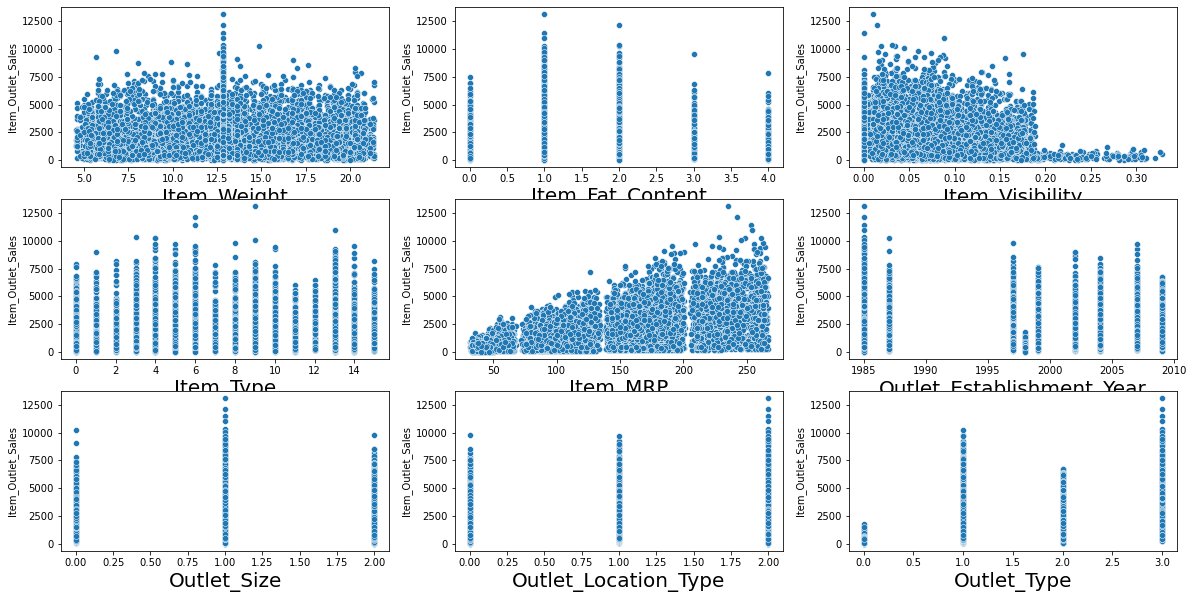

In [148]:
### Checking the relation between target and feature 
x= df.drop(columns='Item_Outlet_Sales')
y=df["Item_Outlet_Sales"]
mlt.figure(figsize=(20,10))
pn=1
for column in x:
    if pn <= 9:
        ax= mlt.subplot(3,3, pn)
        sns.scatterplot(x[column],y)
        mlt.xlabel(column, fontsize= 20)
    pn+=1
mlt.show()

### From the above plotting I conclude that all features has good relation with target. I will take appropriate action after ploting the Heatmap.

### Now going to check the multicollinearity through heatmap 


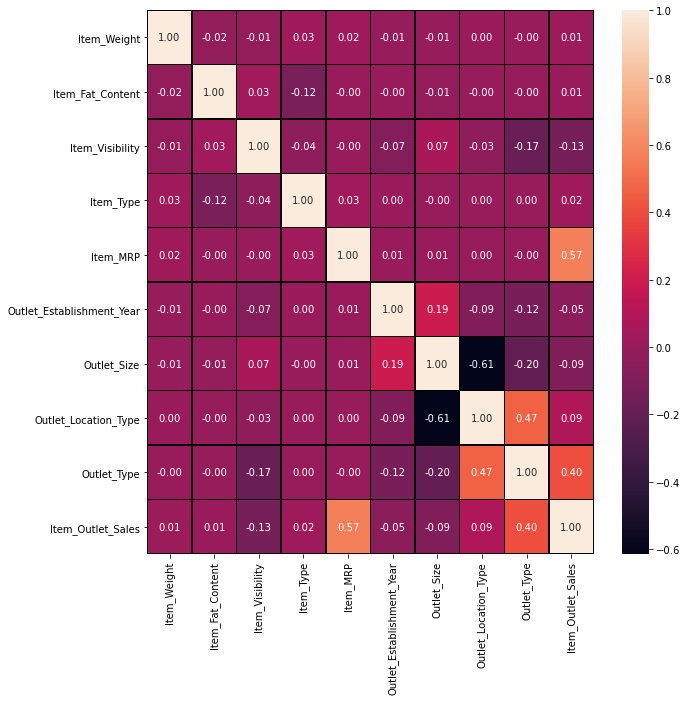

In [149]:
mlt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
mlt.show()

### I conclude from the Heatmap that Some feature has very low realtion with the target like - 1% but I cannot frop these feature beacure there no more features availble to build model.

### Outlet lcation and outlet type only has some multicolinearity which is not more than 50%. So, I will keep both features.
### Outlet sales(Target) has maximum realtion with  -Item_MRP(57%)
### Outlet sales(Target) has minimum realtion with  -Item_Weigth and Item_fat_content(1%)

### Plotting distplot to check distribution of the feature and target.  

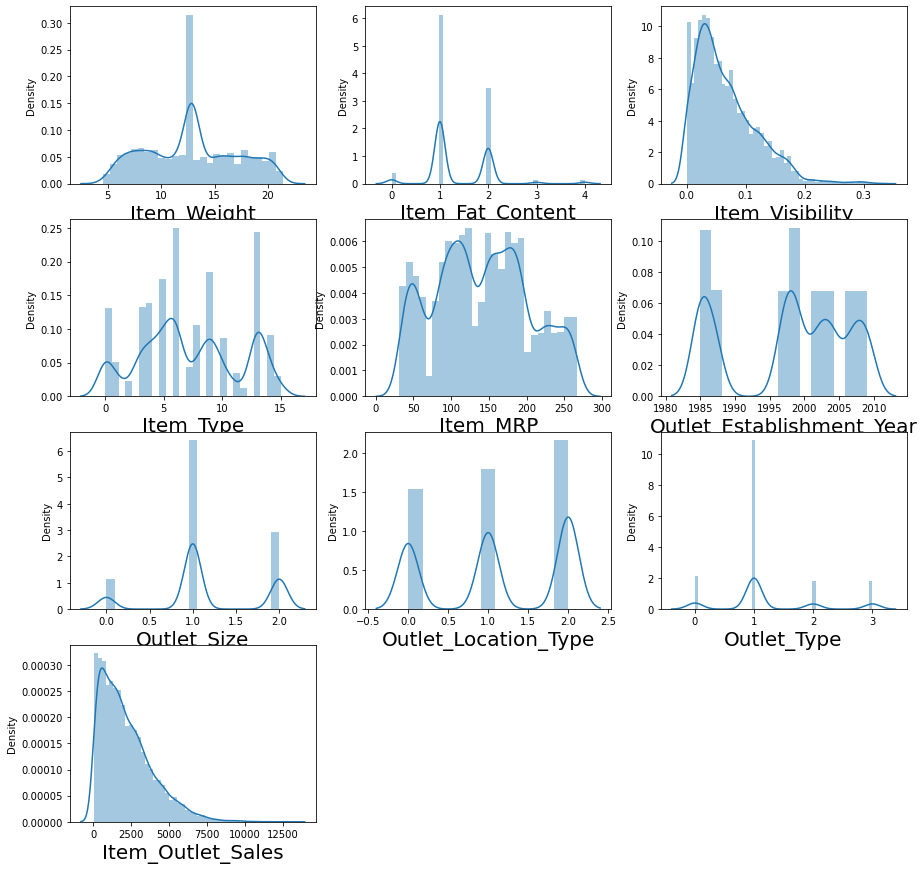

In [150]:
mlt.figure(figsize=(15,15))
pn=1
for column in df:
    if pn <= 12:
        ax= mlt.subplot(4,3, pn)
        sns.distplot(df[column])
        mlt.xlabel(column, fontsize= 20)
    pn+=1
mlt.show()

### All feature are categorical expect Item Weight, Item MRP, Item Visibility and Item sales.

### Item Weight has not normal distribution, I will deal with in Skewness handling
### Item MRP has some normal distribution, I will deal with in Skewness handling 
### Item Visibility has normal distribution but right skewed
### Item outlet sales has normal distribution but right skewed.


### Checking the Stats of the dataset thorugh heatmap plot

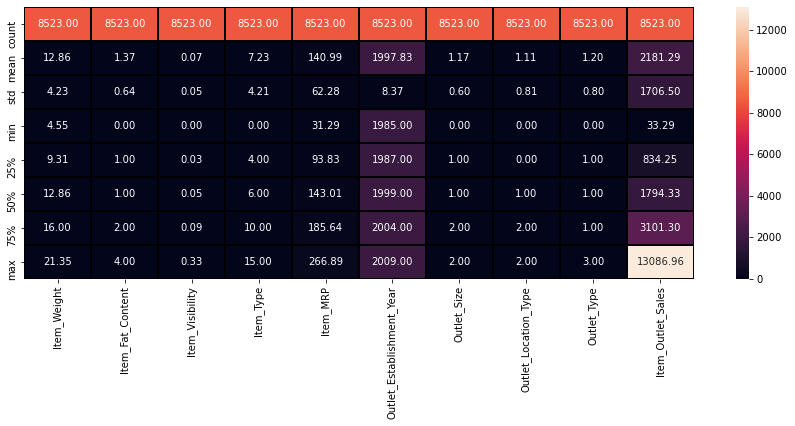

In [151]:
mlt.figure(figsize=(15,5))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
mlt.show()

### All Stats seems normal expect Outlet Sales which has Maximum value which is not normal in respect to min and other quaters. Will deal with in boxplot.

### Checking Skewness of the dataset

In [152]:
df.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

#### Keeping value +/-0.5. There are only one feature which has some skewness.

In [153]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df_new=pd.DataFrame(df_new, columns=df.columns)

In [154]:
df_new.skew() ## checking that skewness is removed or not.

Item_Weight                 -0.068024
Item_Fat_Content             0.032643
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
Item_Outlet_Sales           -0.074791
dtype: float64

#### We sucessfully removed the skewness of the features.

## Chekcing the outliers. Plotting the boxplot

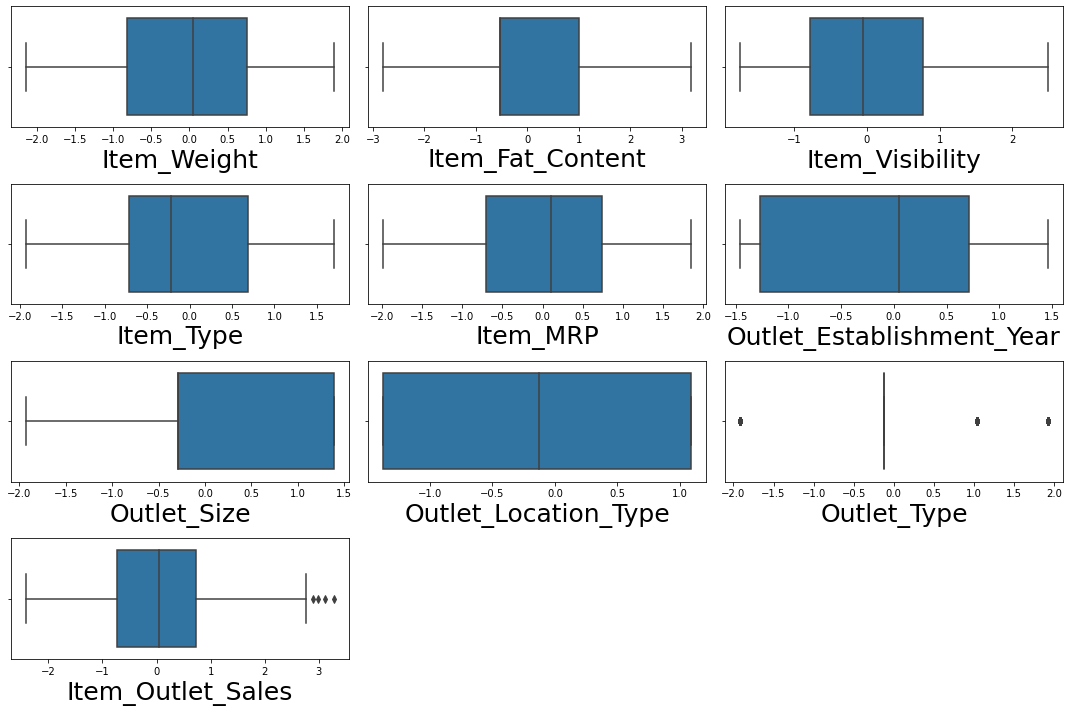

In [155]:
mlt.figure(figsize=(15,10), facecolor='white')
pn = 1
for column in df_new:
    if pn <= 12:
        ax = mlt.subplot(4,3, pn)
        sns.boxplot(df_new[column])
        mlt.xlabel(column, fontsize =25)
    pn+=1
mlt.tight_layout()

### In the above Boxpolot only the feature has oultiers Item_outlet_sales, outlet_type and Itme Visibility.I will try to remove these outliers with zscore

In [156]:
### Importing Zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_new))
z.shape

(8523, 10)

In [157]:
thresold =3
print(np.where(z>3))

(array([  81,  151,  199,  339,  396,  489,  615,  727,  753,  838,  891,
       1010, 1034, 1090, 1124, 1133, 1183, 1209, 1372, 1433, 1512, 1542,
       1549, 1576, 1615, 1617, 1684, 1723, 1753, 1769, 2062, 2111, 2143,
       2168, 2173, 2223, 2331, 2438, 2552, 2569, 2660, 2678, 2905, 2971,
       2973, 3011, 3225, 3241, 3242, 3243, 3335, 3367, 3480, 3491, 3509,
       3545, 3582, 3602, 4019, 4083, 4163, 4245, 4290, 4393, 4415, 4463,
       4680, 4865, 5047, 5054, 5133, 5146, 5202, 5223, 5401, 5417, 5467,
       5539, 5577, 5611, 5633, 5784, 6132, 6176, 6268, 6344, 6357, 6370,
       6462, 6468, 6486, 6540, 6729, 6803, 6843, 7001, 7146, 7147, 7188,
       7200, 7308, 7318, 7353, 7496, 7535, 7693, 7703, 7712, 7722, 7745,
       7751, 7910, 7944, 8004, 8085, 8143, 8233, 8387, 8517], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [158]:
df_new_out =df_new[(z<3).all(axis=1)]
df_new_out.shape

(8404, 10)

## Data Loss

In [159]:
data_loss = (8523-8404)/8523*100
print("Data Loss of the dataset after removing the outliers", data_loss )

Data Loss of the dataset after removing the outliers 1.3962219875630646


### Data loss is 1.39% which is acceptable. 

### Now importing the testing dataset

In [160]:
df_test =pd.read_csv(r'C:\Users\DELL\Downloads\bigdatamart_test.csv')
df_test.head() ### Checking the dataset 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [161]:
### Size of the dataset
df_test.shape

(5681, 11)

In [162]:
### Checking the null values 
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [163]:
## Droping same feature which is fropped in Training data set
df_test.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True, axis =0)
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [164]:
### Filling the missing data with SimpleImputer 
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test['Outlet_Size']=si.fit_transform( df_test[['Outlet_Size']])

In [165]:
#### Changing the Categorical valuse with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
col=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type', 'Item_Type']
df_test[col]= df[col].apply(le.fit_transform)
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,4,107.8622,1999,1,0,1
1,8.300,2,0.038428,14,87.3198,2007,1,2,2
2,14.600,1,0.099575,10,241.7538,1998,1,0,1
3,7.315,2,0.015388,6,155.0340,2007,1,2,0
4,NaN,1,0.118599,9,234.2300,1985,0,2,1


In [166]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy='mean')
df_test['Item_Weight']=si.fit_transform( df_test[['Item_Weight']])

In [167]:
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Now there is no null values is testing dataset

In [168]:
### Checking the skewness of the testing dataset
df_test.skew()

Item_Weight                  0.142813
Item_Fat_Content             1.005755
Item_Visibility              1.238312
Item_Type                    0.116388
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.088234
Outlet_Location_Type        -0.217005
Outlet_Type                  0.954298
dtype: float64

In [169]:
### Will treat the skewness from the power tranform 
from sklearn.preprocessing import power_transform
df_test_new = power_transform(df_test)
df_test_new=pd.DataFrame(df_test_new, columns=x.columns)

In [170]:
df_test_new.skew()

Item_Weight                 -0.060915
Item_Fat_Content             0.032893
Item_Visibility              0.116776
Item_Type                   -0.160735
Item_MRP                    -0.111040
Outlet_Establishment_Year   -0.200515
Outlet_Size                 -0.044010
Outlet_Location_Type        -0.221651
Outlet_Type                  0.009124
dtype: float64

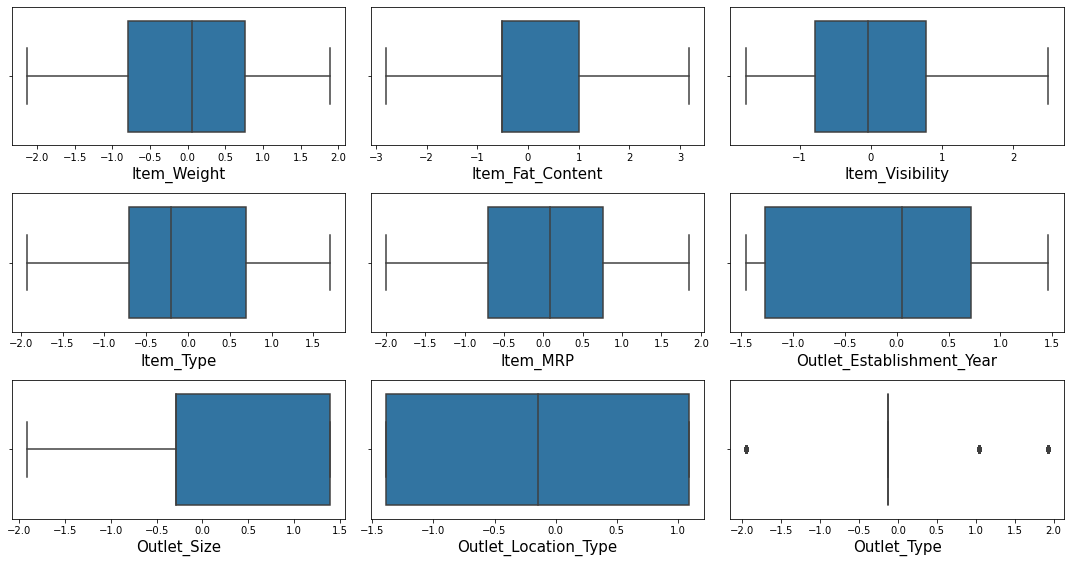

In [171]:
###  Checking the outliers of the test dataset
mlt.figure(figsize=(15,10), facecolor='white')
pn = 1
for column in df_test_new:
    if pn <= 12:
        ax = mlt.subplot(4,3, pn)
        sns.boxplot(df_test_new[column])
        mlt.xlabel(column, fontsize =15)
    pn+=1
mlt.tight_layout()

### Only outlet type has some outlier which I dont need to remove because only three outlier is there which is acceptable.

## Now moving toward model building and first spliting the traing data and then importing the libraries

In [172]:
x= df_new_out.drop(columns='Item_Outlet_Sales')
y=df_new_out['Item_Outlet_Sales']
test = df_test_new
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [173]:
### Scaling the dataset
sc= StandardScaler()
x_scaled= sc.fit_transform(x)
test_scaled=sc.fit_transform(test)

In [174]:
### using train test split for spliting the dataset into the testing and training
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y , test_size=.20, random_state=25)

In [175]:
#### Importing model
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [176]:
### Importing the LinearRegression and checking the score and r2 score
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)

print("\n LinearRegression Model Accuracy and Model Scores",  '\n\nR2 score for LinearRegression model', r2_lr*100)


 LinearRegression Model Accuracy and Model Scores 

R2 score for LinearRegression model 64.24039386401722


In [177]:
### Importing the DecisionTreeRegressor and checking the score and r2 score
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
r2_DTR =r2_score(y_test,pred_DTR)

print("\n DecisionTreeRegressor Model Accuracy and Model Scores",  '\n\nR2 score for DecisionTreeRegressor model', r2_DTR*100)


 DecisionTreeRegressor Model Accuracy and Model Scores 

R2 score for DecisionTreeRegressor model 38.77373386056357


In [178]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)

print("\n RandomForestRegressor Model Accuracy and Model Scores",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100)


 RandomForestRegressor Model Accuracy and Model Scores 

R2 score for RandomForestRegressor model 66.73340207670493


In [179]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)

print("\n KNeighborsRegressor Model Accuracy and Model Scores",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100)


 KNeighborsRegressor Model Accuracy and Model Scores 

R2 score for KNeighborsRegressor model 64.20151617922116


In [180]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)

print("\n SupportVectorRegressor Model Accuracy and Model Scores",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100)


 SupportVectorRegressor Model Accuracy and Model Scores 

R2 score for SupportVectorRegressor model 70.6092432382851


### I performed 5 model prediction R2_score, those score are mentioned below -
#### R2 score for LinearRegression model 64.24039386401722
#### R2 score for DecisionTreeRegressor model 38.38412283919473
#### R2 score for RandomForestRegressor model 67.09463807764809
#### R2 score for KNeighborsRegressor model 64.20151617922116
#### R2 score for SupportVectorRegressor model 70.6092432382851
### From the above, I conclude that I will go forward with SVR model as the r2_score is 70.60%.

### The SupportVectorRegressor model is performing good. Tried to perform hyperparameter tuning but it took took much time. So I am dropping the hypermeter and moving forward and checking the Cross Validation.

In [181]:
#### Importing the cross validation 
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svr, x_scaled,y, cv=5)
print("Cross Validation for RandomForestRegressor is ", scr.mean())

Cross Validation for RandomForestRegressor is  0.6847458299398659


## The model score and cross validation score is very approx same. It the model will consider as good model

### Checking the errors metrics like - mean_absolute_error, mean_squared_error

In [182]:
mae = mean_absolute_error(y_test,pred_svr)
mse = mean_squared_error(y_test,pred_svr)
rmse = np.sqrt(mse)
print("Error for the RandomForestRegressor", '\n\nMean_absolute_error', mae,"\nMean_squared_error", mse, '\nRoot mean_squared_error', rmse)

Error for the RandomForestRegressor 

Mean_absolute_error 0.4251504463368478 
Mean_squared_error 0.2982823199234388 
Root mean_squared_error 0.5461522863848862


### All the errors are normal and will take it as positive for the model

## Now predict the sales for the  test data set

In [183]:
p = svr.predict(sc.transform(test_scaled))
prec = pd.DataFrame({"outlet_sales": p})
test_dataset = pd.concat([df_test,prec], axis=1)
test_dataset.sample(10)
#prec.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,outlet_sales
1222,7.020000,1,0.081164,13,146.7734,1997,1,2,3,0.584856
918,12.695633,1,0.019417,10,263.4910,1985,2,0,0,-1.188280
3961,7.285000,1,0.049964,14,155.9288,1997,2,0,1,0.327106
767,15.500000,2,0.103652,5,141.4470,2002,1,0,1,0.313125
1801,12.695633,1,0.022317,8,229.5036,1985,2,1,1,0.137398
3414,10.000000,2,0.063532,4,228.6668,2007,1,2,3,0.820671
4783,12.695633,1,0.061744,8,59.2562,1985,0,2,1,-0.802051
5593,12.695633,0,0.092845,6,116.8124,1985,1,2,2,0.636547
3957,12.500000,1,0.081067,5,220.2798,1987,1,0,1,0.467105
5026,12.695633,1,0.168259,8,130.4942,1985,2,0,1,-0.320695


### Saving the model 

In [191]:
import joblib
joblib.dump(svr, 'Bigmartsales.pkl')

['Bigmartsales.pkl']